In [3]:
import plotly.express as px

In [5]:
fig = px.scatter_mapbox(df_housing, lat="lat", lon="long", # ,hover_name="name", hover_data=["city", "state"],
                        color_discrete_sequence=["blue"], zoom=8, width=800, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":10,"t":10,"l":10,"b":10})
fig.show()

NameError: name 'df_housing' is not defined

In [ ]:
# export the data to a csv-file as a backup
# df_housing.to_csv('data/housing.csv',index=False)

In [ ]:
# import the data from a csv-file alternatively
# df_import = pd.read_csv('data/housing.csv')

In [ ]:
# make a crosstab by month and grade ()
# different command for same result: df_housing.groupby([df_housing.date.dt.month, df_housing.grade])['usd_per_sqft'].median().unstack()
ct_month_grade = pd.crosstab(df_housing.where(df_housing.grade > 5).where(df_housing.grade < 11).date.dt.month, 
                             df_housing.grade, values=df_housing.usd_per_sqft, 
                             aggfunc='median')
ct_month_grade

grade,6,7,8,9,10
date,,,,,
1.0,215.596330,215.928270,234.412955,259.545836,258.064516
2.0,247.081646,219.308807,237.016575,245.367717,261.464891
3.0,234.361979,232.725096,258.799201,268.976898,291.803279
4.0,255.697674,239.816658,264.564480,261.135611,284.511785
5.0,252.475248,238.755981,248.148148,252.232143,271.214444
6.0,244.644550,229.629630,246.552511,269.852707,271.111111
7.0,234.851622,227.272727,243.506494,254.968258,271.860995
8.0,256.858105,222.050880,245.312500,259.245283,256.451613
9.0,236.000000,226.019992,252.545573,247.737374,267.678918


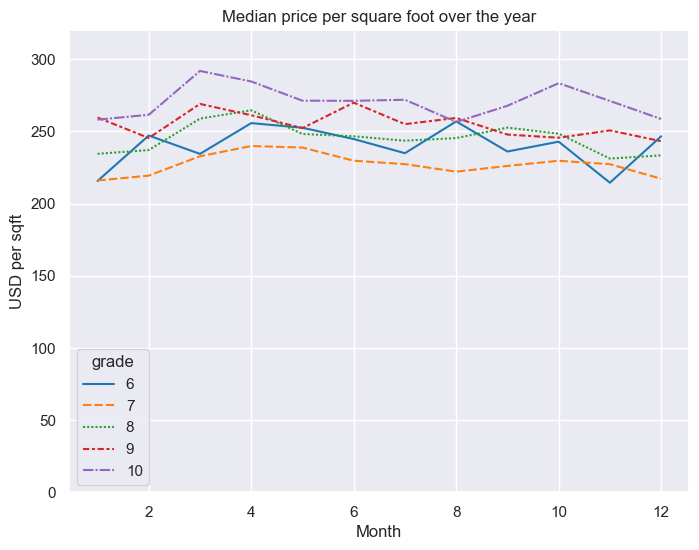

In [ ]:
fig = sns.lineplot(data=ct_month_grade)#, x='month', y='median_usd_per_sqft', color='aquamarine')
fig.set(xlabel='Month', ylabel='USD per sqft', title='Median price per square foot over the year')
fig.set_ylim(0,320)
plt.show()

In [ ]:
# make a crosstab by weekday and grade ()
# different command for same result: df_housing.groupby([df_housing.date.dt.month, df_housing.grade])['usd_per_sqft'].median().unstack()
ct_wd_grade = pd.crosstab(df_housing.where(df_housing.grade > 0).where(df_housing.bedrooms < 7).date.dt.weekday, 
                             df_housing.bedrooms, values=df_housing.usd_per_sqft, 
                             aggfunc='median')
ct_wd_grade

bedrooms,1,2,3,4,5,6
date,,,,,,
0.0,377.419355,328.282828,248.201439,230.848214,225.366986,219.594595
1.0,328.734671,320.332485,238.803483,230.870712,224.469854,202.762899
2.0,394.578313,313.245033,244.252114,227.601592,229.083665,175.080959
3.0,388.888889,309.076808,241.134752,228.000000,213.687151,209.043163
4.0,421.428571,313.330995,245.412844,226.551472,218.029350,228.576439
5.0,287.769784,321.357943,257.499447,238.095238,246.478495,174.223023
6.0,333.333333,343.081687,236.938202,241.666667,212.703252,252.112676


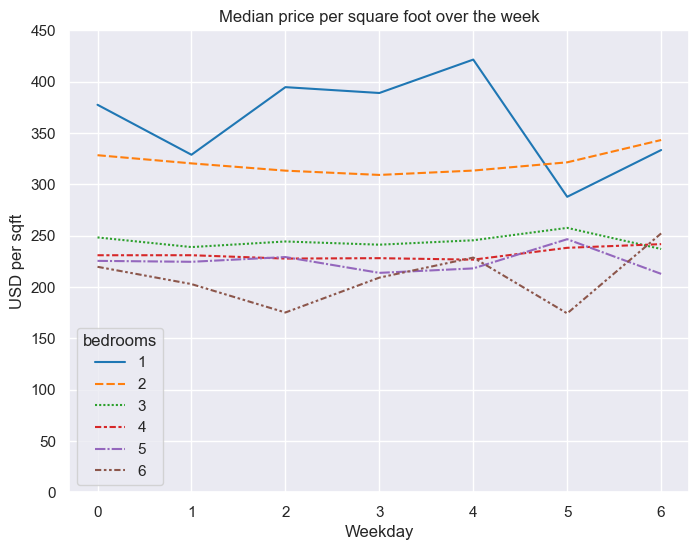

In [ ]:
fig = sns.lineplot(data=ct_wd_grade)#, x='month', y='median_usd_per_sqft', color='aquamarine')
fig.set(xlabel='Weekday', ylabel='USD per sqft', title='Median price per square foot over the week')
fig.set_ylim(0,450)
plt.show()

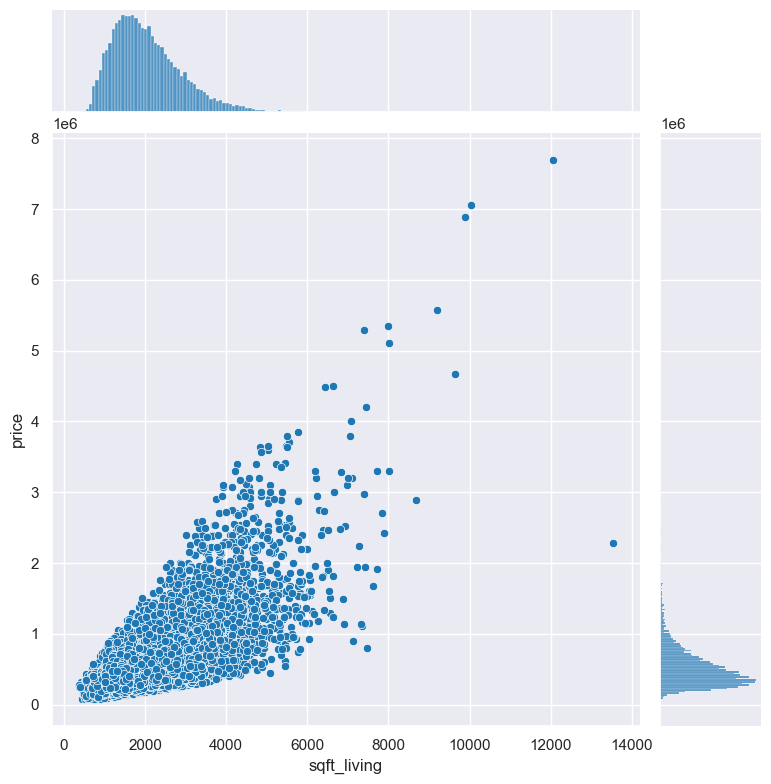

In [ ]:
sns.set_theme(context='notebook', style='darkgrid', palette='tab10')
sns.color_palette("rocket", as_cmap=True)
jp = sns.jointplot(data=df_housing, x='sqft_living', y='price', height=8)#, hue='floors', xlim={0,6000}, ylim={0,4e6})
#jp.plot_joint(sns.kdeplot, color="r", zorder=1, levels=5)

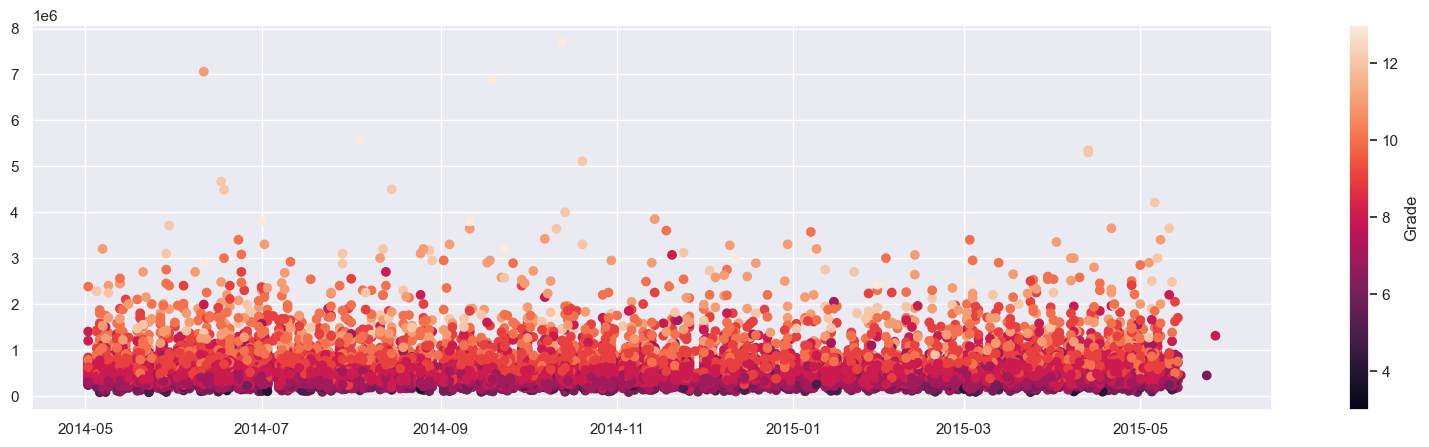

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(x=df_housing.date, y=df_housing.price, c=df_housing.grade, label = 'House sale prices')
plt.colorbar(label = "Grade")